In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_validate
from sklearn.cluster import KMeans


In [ ]:
dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']

X1 = StandardScaler().fit_transform(X)
X = pd.DataFrame(X1, columns=X.columns)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-0.007901,-0.000862,0.000732,0.005771,0.000621,-0.004275,0.004345,-0.002366
std,1.001465,0.999477,1.050939,1.070296,1.009785,0.618925,1.001543,1.001168
min,-1.774299,-2.196180,-1.852319,-1.610768,-1.256123,-0.223445,-1.447568,-2.385992
25%,-0.696396,-0.845393,-0.404995,-0.191775,-0.562926,-0.061682,-0.792107,-1.113209
50%,-0.186191,0.028646,-0.085143,-0.101171,-0.229132,-0.024379,-0.642287,0.533922
75%,0.451437,0.664310,0.249344,0.005979,0.266261,0.020488,0.977638,0.778496
max,5.858286,1.856182,55.163236,69.571713,30.250330,57.448030,2.958068,2.625280


## K-Means

---

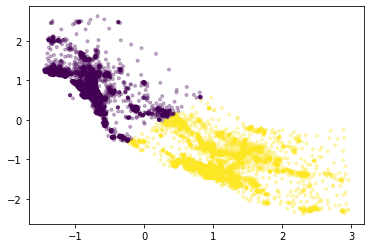

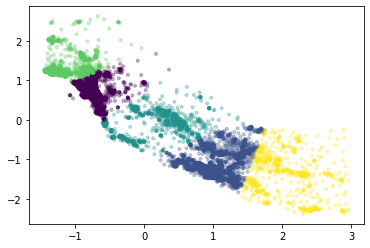

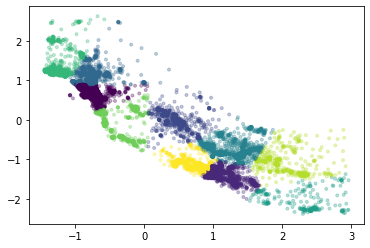

In [ ]:
#kmeans.labels_
#kmeans.predict([[0, 0], [12, 3]])
#kmeans.cluster_centers_

kmeans = KMeans(n_clusters=2, random_state=0).fit(X[['Latitude','Longitude']])
plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, alpha=0.3, marker='.') 
plt.show()

kmeans = KMeans(n_clusters=5, random_state=0).fit(X[['Latitude','Longitude']])
plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, alpha=0.3, marker='.') 
plt.show()

kmeans = KMeans(n_clusters=10, random_state=0).fit(X[['Latitude','Longitude']])
plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, alpha=0.3, marker='.') 
plt.show()

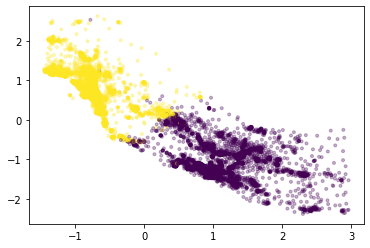

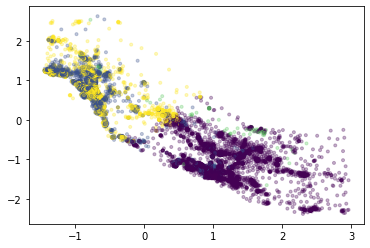

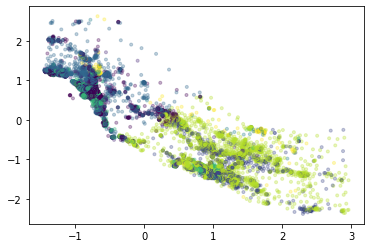

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, alpha=0.3, marker='.') 
plt.show()

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, alpha=0.3, marker='.') 
plt.show()

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, alpha=0.3, marker='.') 
plt.show()

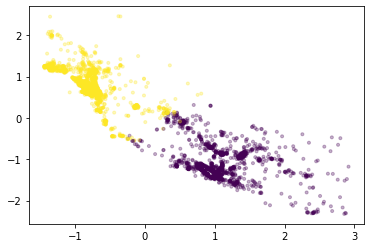

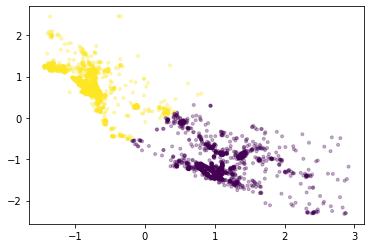

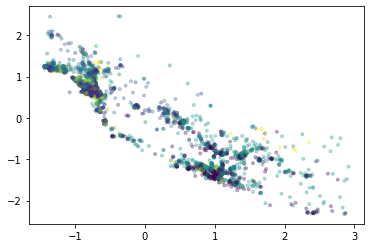

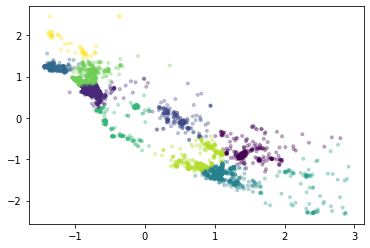

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
pred = kmeans.predict(X_test)
plt.scatter(X_test['Latitude'],X_test['Longitude'], c=pred, alpha=0.3, marker='.') 
plt.show()

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train[['Latitude','Longitude']])
pred = kmeans.predict(X_test[['Latitude','Longitude']])
plt.scatter(X_test['Latitude'],X_test['Longitude'], c=pred, alpha=0.3, marker='.') 
plt.show()

kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train)
pred = kmeans.predict(X_test)
plt.scatter(X_test['Latitude'],X_test['Longitude'], c=pred, alpha=0.3, marker='.') 
plt.show()

kmeans = KMeans(n_clusters=10, random_state=0).fit(X_train[['Latitude','Longitude']])
pred = kmeans.predict(X_test[['Latitude','Longitude']])
plt.scatter(X_test['Latitude'],X_test['Longitude'], c=pred, alpha=0.3, marker='.') 
plt.show()

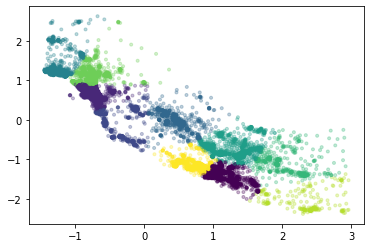

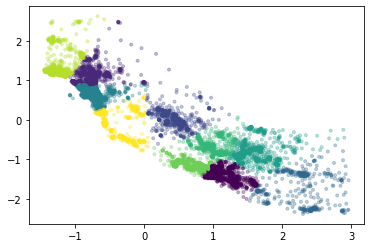

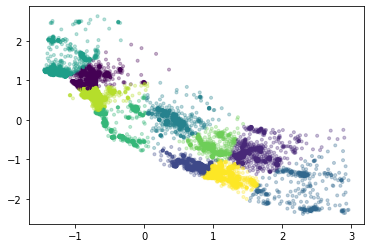

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=10).fit(X[['Latitude','Longitude']])
plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, alpha=0.3, marker='.') 
plt.show()

kmeans = KMeans(n_clusters=10, random_state=20).fit(X[['Latitude','Longitude']])
plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, alpha=0.3, marker='.') 
plt.show()

kmeans = KMeans(n_clusters=10, random_state=30).fit(X[['Latitude','Longitude']])
plt.scatter(X['Latitude'],X['Longitude'], c=kmeans.labels_, alpha=0.3, marker='.') 
plt.show()

## Dendograms

---

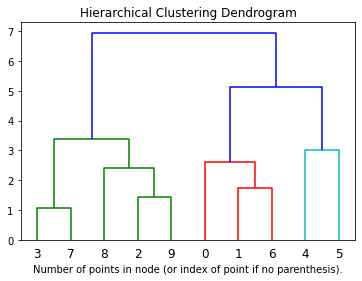

In [ ]:
# Exemplo retirado de https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

X_l = X_test[0:10]
model = model.fit(X_l)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
X_test[0:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4648,-0.970047,0.187562,-1.043635,-0.010622,1.484874,0.005608,-0.735924,0.628757
8740,0.228937,0.108104,-0.158468,-0.180020,-0.459609,-0.048107,-0.852971,0.628757
162,-0.102997,1.856182,-0.233477,-0.269178,-0.333332,-0.100858,1.019775,-1.332827
15735,-0.648219,-0.209729,-0.645377,0.016935,0.349268,-0.108335,1.005730,-1.427661
18380,2.803873,-0.448103,1.069858,-0.277454,-0.449895,-0.016553,0.738863,-1.143157
10643,2.103053,0.584852,0.496323,-0.067420,-0.677723,-0.090624,-0.970018,0.888305
10623,0.336213,-1.322142,-0.405244,-0.009813,0.430509,-0.107322,-0.918517,0.898288
1612,-0.726965,-0.209729,-0.363690,-0.072860,-0.658296,-0.172356,1.047866,-1.252966
2634,-0.679170,1.141059,0.019865,-0.149754,-0.455193,-0.070416,2.335379,-2.276184
15995,1.023505,1.856182,0.575741,-0.167617,-0.709513,-0.037515,0.991684,-1.442635


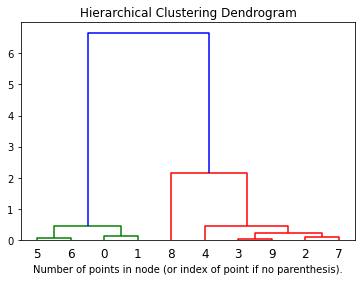

In [ ]:
X_l = X_test[0:10][['Latitude','Longitude']]
model = model.fit(X_l)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
X_test[0:10][['Latitude','Longitude']]

,Latitude,Longitude
4648,-0.735924,0.628757
8740,-0.852971,0.628757
162,1.019775,-1.332827
15735,1.005730,-1.427661
18380,0.738863,-1.143157
10643,-0.970018,0.888305
10623,-0.918517,0.898288
1612,1.047866,-1.252966
2634,2.335379,-2.276184
15995,0.991684,-1.442635


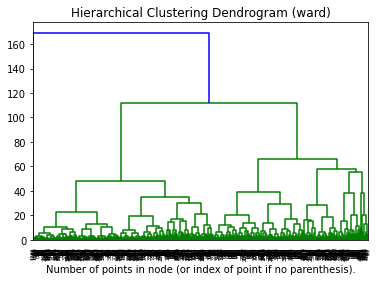

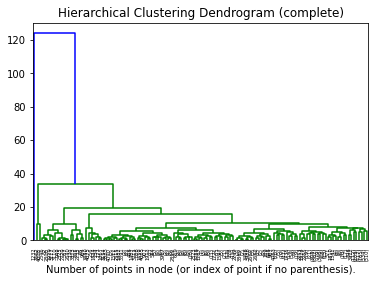

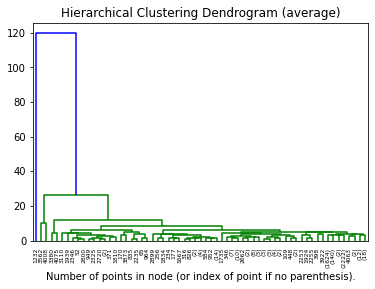

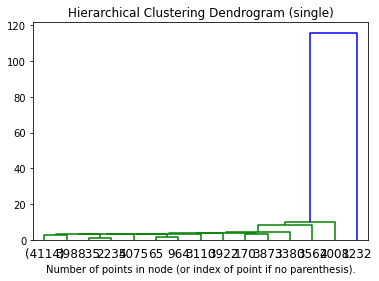

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
for link in ['ward','complete','average','single']:
  model = AgglomerativeClustering(distance_threshold=0, linkage=link, n_clusters=None)
  X_l = X_test
  model = model.fit(X_l)
  plt.title("Hierarchical Clustering Dendrogram (" + link + ")")
  # plot the top three levels of the dendrogram
  plot_dendrogram(model, truncate_mode="level", p=10)
  plt.xlabel("Number of points in node (or index of point if no parenthesis).")
  plt.show()

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
for link in ['ward','complete','average','single']:
  model = AgglomerativeClustering(distance_threshold=0, linkage=link, n_clusters=None)
  X_l = X_test
  model = model.fit(X_l)
  plt.title("Hierarchical Clustering Dendrogram (" + link + ")")
  # plot the top three levels of the dendrogram
  plot_dendrogram(model, truncate_mode="level", p=10)
  plt.xlabel("Number of points in node (or index of point if no parenthesis).")
  plt.show()